# Photonic Chip

## Physical Constants

In [1]:
N_A = 6.02214129E23         # Avogadro Constant (mol^-1)
c = 299792458               # Speed of light (m/s)
h = 6.62606957E-34          # Planck Constant (m^2 kg / s)
e = 1.6E-19                 # Charge of an electron (c)

import numpy as np
import matplotlib.pyplot as plt
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


###Erbium

Erbium 3+ ions are excited from the 4I_15/2 ground level to the 4S_11/2 level through absorption of a 980nm photon (polman1997Review) .

In [2]:
sig_a = 2E-21               # Absorption cross-section (cm^2), cite{polman1993snoeks}

Non-radiative relaxation to the 4I_13/2 excited state occurs. <b>This is a fast process</b>. There is a cross-section associated with the excited Erbium ions.

In [3]:
sig_ae = sig_a / 4000       # Approximation for excited stated absorption from cite{imai1996Temperaturesensing}

Once in the lowest level of the excited state the Er3+ ions can radiatively decay back to the ground state, releasing 1540nm radiation. <b> This is a spin forbidden process and therefore occurs over a longer period of time</b>.

In [4]:
# From Polman review 1997 Table III (in Soda Lime Glass)
lam_pump = 980              # Pump wavelength (nm)
lam_sig = 1536              # Signal wavelength (um)
sig_ap = 1E-21              # Pump absorption cross section (cm^2)
sig_as = 4.1E-21            # Signal absorption cross section (cm^2)
sig_es = 5.0E-21            # Signal emission cross section (cm^2)
rho_silica = 1              # Density of silica glass (at./cm^3)
er_conc = 1

# Table 5
t1 = 7.8                    # Er 1st excited state lifetime (ms)
t2 = 1                     # Er 1st excited state lifetime, less than 1 in silica (us)

### Glass Properties

In [5]:
# Transparence
transSilica = 92.5          # Undoped silica glass (%)
transDoped = 87             # Doped layer (%)

# Chemical Composition
oh = 1350                   # OH in ppm
al = 10                     # AL in ppb
ca = 15                     # Ca in ppb
cr = 11                     # Cr in ppb
cu = 3                      # Cu in ppb
fe = 5                      # Fe in ppb
k = 10                      # K  in ppb
li = 1                      # Li in ppb
mg = 5                      # Mg in ppb
na = 10                     # Na in ppb
ti = 5                      # Ti in ppb
v = 5                       # V  in ppb

# Glass is roughly 99.9% pure silica (SiO2)

spec200_rho = 2.2           # Density (g/cm^3)

### Variable Constants

Incident Light:

In [6]:
lamb_i = 980                # Incident wavelength (nm)
opt_pow = 0.1               # Optical power (W)

## Calculations

In [8]:
percMole = 0.5              # Percent concentration (at .% mol)
#conc1 =                     # Mole fraction
conc = 55.4086E3                 # Erbium Concentration (mol/m^3)
n = N_A * conc              # Number density (=N/V)
print('Number density of erbium ions is: %E Er/cm^3'% (n*1E-6))

Number density of erbium ions is: 3.336784E+22 Er/cm^3


Fluorescence power of the chip is of the order of nW at 1540nm.

In [9]:
lamb_e = 1540              # Emitted fluorescence (nm)
f = c / lamb_e             # Frequency (GHz)
energy = h * f * 1E9       # Energy of a fluorescent photon (J)

In [10]:
energy_ev = energy/e
print ('Energy of a %d nm photon is %E eV'% (lamb_e, energy_ev))

Energy of a 1540 nm photon is 8.061874E-01 eV


In [11]:
fl_pow = 5                 # Fluorescent spectrum peak power 
print('Peak optical fluorescent power through the chip: %d nW' % fl_pow)

photons = fl_pow / energy

print('Number of photons fluorescent photons per second: %E'% photons)

Peak optical fluorescent power through the chip: 5 nW
Number of photons fluorescent photons per second: 3.876270E+19


## Detector

In [12]:
detector = 0.2           # Detector area (mm^2)
measure = 1                # FL_pow easurement area (mm^2)
hit = photons * detector / measure     # Photons hitting the detector
print('Expected number of hits for 100%% conversion: %E'% hit)

Expected number of hits for 100% conversion: 7.752540E+18


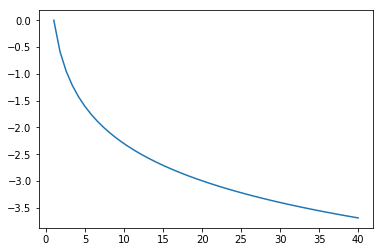

In [13]:
x = np.linspace(1,40)
plt.plot(x,np.log(1/x))